In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers
import keras

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/MyDrive/Danger detection using audio/Audio Signal Dataset for Danger Detection of Women and Children.zip' -d '/content/'

In [ ]:
audio_data = []
labels = []
sampling_rate = []
file_names = []


In [ ]:
#samplerate, data = wavfile.read("dataset/dog/1-30344-A.wav")
data, samplerate = librosa.load("/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/test/Normal/1110_10_patch.wav", sr=44000) # Downsample 44.1kHz to 8kHz

print(data.shape)
print(samplerate)

(44000,)
44000


In [ ]:
time_sec = (len(data)/samplerate)
step = time_sec/len(data)
print(time_sec)
print(step)
i=0
time_divion=[]
while i<=time_sec-step:

    time_divion.append(i)
    i=i+step
# the fourth second step
four_sec_step_number = (4*len(time_divion))/time_sec
print(four_sec_step_number)

1.0
2.2727272727272726e-05
176000.0


In [ ]:
import glob
import librosa

classes = []
label_number = 0
data = []

for class_dir in ['Women', 'Child', 'Normal']:
    classes.append(class_dir)

    for audio_file in glob.iglob(f'/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/train/{class_dir}/*'):
        y, s = librosa.load(audio_file, sr=44000)  # Downsample to 44000 Hz
        data.append([y, label_number])

    label_number += 1

print(classes)


['Women', 'Child', 'Normal']


In [ ]:
import glob

child_directory = '/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/train/Child'
audio_files = glob.glob(child_directory + '/*.wav')  # assuming the audio files have a .wav extension

number_of_audio_files = len(audio_files)

print(f"Number of audio files in the 'child' directory: {number_of_audio_files}")


Number of audio files in the 'child' directory: 4542


In [ ]:
import glob

child_directory = '/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/train/Normal'
audio_files = glob.glob(child_directory + '/*.wav')  # assuming the audio files have a .wav extension

number_of_audio_files = len(audio_files)

print(f"Number of audio files in the 'child' directory: {number_of_audio_files}")


Number of audio files in the 'child' directory: 4522


In [ ]:
import glob

child_directory = '/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/train/Women'
audio_files = glob.glob(child_directory + '/*.wav')  # assuming the audio files have a .wav extension

number_of_audio_files = len(audio_files)

print(f"Number of audio files in the 'child' directory: {number_of_audio_files}")


Number of audio files in the 'child' directory: 4498


In [ ]:
import random

random.shuffle(data)
audio_data=[]
labels=[]
for i,j in data:
    audio_data.append(i)
    labels.append(j)

In [ ]:
print(labels[0])

0


Text(0.5, 1.0, 'signal in real time')

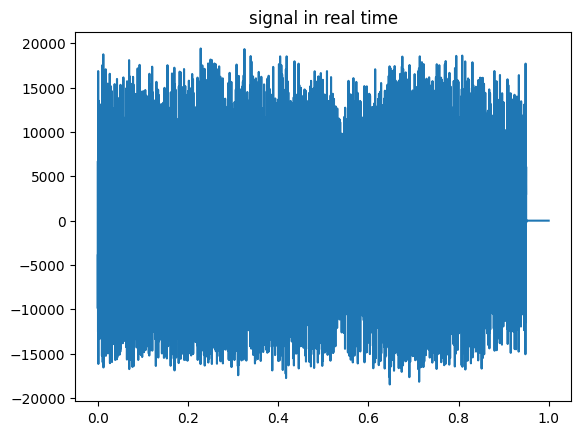

In [ ]:
#save_path='dog_time.jpg'
plt.plot(time_divion[0:192000],audio_data[4][0:192000])
#plt.show()
plt.title('signal in real time')
#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()

In [ ]:
example = random.randint(0,4400)
mel_feat = librosa.feature.melspectrogram(y=audio_data[164],sr=44000)
power = librosa.power_to_db(mel_feat,ref=np.max)
print(power.shape)
print(labels[example])

(128, 86)
1


In [ ]:
example

864

Text(0.5, 1.0, 'Mel Spectrogram')

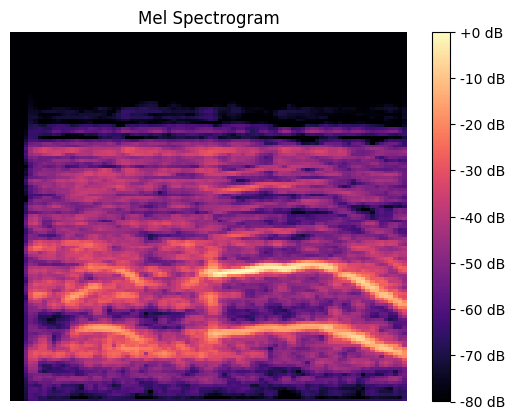

In [ ]:
save_path = 'sound.jpg'

plt.axis('off') # no axis
librosa.display.specshow(power)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

In [ ]:
melspectrogram = []
for i in range (0,4498):
    if i%100 == 0:
        print(i)
    mel_feat = librosa.feature.melspectrogram(y=audio_data[i],sr=44000)
    power = librosa.power_to_db(mel_feat)

    power=power.reshape(-1,1)


    melspectrogram.append(power[:54656])
    if power.shape[0]<54656:
        print(i)
        print(power.shape)

melspectrogram =np.array(melspectrogram)
melspectrogram.shape

Streaming output truncated to the last 5000 lines.
2010
(11008, 1)
2011
(11008, 1)
2012
(11008, 1)
2013
(11008, 1)
2014
(11008, 1)
2015
(11008, 1)
2016
(11008, 1)
2017
(11008, 1)
2018
(11008, 1)
2019
(11008, 1)
2020
(11008, 1)
2021
(11008, 1)
2022
(11008, 1)
2023
(11008, 1)
2024
(11008, 1)
2025
(11008, 1)
2026
(11008, 1)
2027
(11008, 1)
2028
(11008, 1)
2029
(11008, 1)
2030
(11008, 1)
2031
(11008, 1)
2032
(11008, 1)
2033
(11008, 1)
2034
(11008, 1)
2035
(11008, 1)
2036
(11008, 1)
2037
(11008, 1)
2038
(11008, 1)
2039
(11008, 1)
2040
(11008, 1)
2041
(11008, 1)
2042
(11008, 1)
2043
(11008, 1)
2044
(11008, 1)
2045
(11008, 1)
2046
(11008, 1)
2047
(11008, 1)
2048
(11008, 1)
2049
(11008, 1)
2050
(11008, 1)
2051
(11008, 1)
2052
(11008, 1)
2053
(11008, 1)
2054
(11008, 1)
2055
(11008, 1)
2056
(11008, 1)
2057
(11008, 1)
2058
(11008, 1)
2059
(11008, 1)
2060
(11008, 1)
2061
(11008, 1)
2062
(11008, 1)
2063
(11008, 1)
2064
(11008, 1)
2065
(11008, 1)
2066
(11008, 1)
2067
(11008, 1)
2068
(11008, 1)
2069


(4498, 11008, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
melspectrogram=melspectrogram.reshape(4498,-1)
scaler.fit(melspectrogram)
normalized_melspectrogram = scaler.transform(melspectrogram)

print(np.amax(melspectrogram))
print(np.amax(normalized_melspectrogram))

129.4949
1.0000001


In [ ]:
features_convolution = np.reshape(normalized_melspectrogram,(4498,128, -1,1))
#melspectrogram=melspectrogram.reshape(400,128, -1)
features_convolution.shape

(4498, 128, 86, 1)

In [ ]:
y=keras.utils.to_categorical(labels, num_classes=3, dtype='float32')

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(3))
model.add(Activation('softmax'))
sgd = optimizers.SGD(learning_rate=0.0000001, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
features_convolution.shape

(4498, 128, 86, 1)

In [ ]:
y.shape

(13562, 3)

In [ ]:
history = model.fit(features_convolution, y,batch_size=8, epochs=30,validation_split=0.2)

Epoch 1/30
450/450 [==============================] - 9s 7ms/step - loss: 0.4327 - accuracy: 0.8316 - val_loss: 0.3350 - val_accuracy: 0.8800
Epoch 2/30
450/450 [==============================] - 2s 5ms/step - loss: 0.2451 - accuracy: 0.9180 - val_loss: 0.1530 - val_accuracy: 0.9544
Epoch 3/30
450/450 [==============================] - 2s 4ms/step - loss: 0.1868 - accuracy: 0.9430 - val_loss: 0.1346 - val_accuracy: 0.9589
Epoch 4/30
450/450 [==============================] - 3s 6ms/step - loss: 0.1250 - accuracy: 0.9625 - val_loss: 0.1164 - val_accuracy: 0.9633
Epoch 5/30
450/450 [==============================] - 3s 6ms/step - loss: 0.1123 - accuracy: 0.9641 - val_loss: 0.1108 - val_accuracy: 0.9656
Epoch 6/30
450/450 [==============================] - 2s 5ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 0.1154 - val_accuracy: 0.9711
Epoch 7/30
450/450 [==============================] - 2s 5ms/step - loss: 0.0771 - accuracy: 0.9739 - val_loss: 0.1120 - val_accuracy: 0.9700
Epoch 

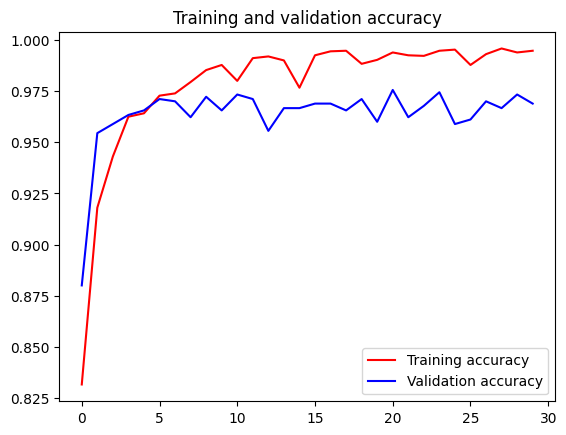

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
!pip install scipy

#Development

In [ ]:
def test_image():
  classes = []
  label_number = 0
  data = []
  for class_dir in ['Women', 'Child', 'Normal']:
      classes.append(class_dir)
      for audio_file in glob.iglob(f'/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/test/{class_dir}/*'):
        try:
          y, s = librosa.load(audio_file, sr=44000)  # Downsample to 44000 Hz
          data.append([y, label_number])
        except: print("Audio File empty Skipping ....")
      label_number += 1

  child_directory = '/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/test/Child'
  audio_files = glob.glob(child_directory + '/*.wav')
  number_of_audio_files_child = len(audio_files)
  child_directory = '/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/test/Women'
  audio_files = glob.glob(child_directory + '/*.wav')
  number_of_audio_files_women = len(audio_files)
  child_directory = '/content/Audio Signal Dataset for Danger Detection of Women┬аand┬аChildren/test/Normal'
  audio_files = glob.glob(child_directory + '/*.wav')
  number_of_audio_files_normal = len(audio_files)


  random.shuffle(data)
  audio_data=[]
  labels=[]
  for i,j in data:
      audio_data.append(i)
      labels.append(j)

  example = random.randint(0,min(number_of_audio_files_child,number_of_audio_files_normal,number_of_audio_files_women))
  mel_feat = librosa.feature.melspectrogram(y=audio_data[164],sr=44000)
  power = librosa.power_to_db(mel_feat,ref=np.max)

  melspectrogram = []
  for i in range (0,min(number_of_audio_files_child,number_of_audio_files_normal,number_of_audio_files_women)):
      mel_feat = librosa.feature.melspectrogram(y=audio_data[i],sr=44000)
      power = librosa.power_to_db(mel_feat)
      power=power.reshape(-1,1)
      melspectrogram.append(power[:54656])
  melspectrogram =np.array(melspectrogram)

  scaler = MinMaxScaler(feature_range=(0, 1))
  melspectrogram=melspectrogram.reshape(min(number_of_audio_files_child,number_of_audio_files_normal,number_of_audio_files_women),-1)
  scaler.fit(melspectrogram)
  normalized_melspectrogram = scaler.transform(melspectrogram)

  features_convolution = np.reshape(normalized_melspectrogram,(min(number_of_audio_files_child,number_of_audio_files_normal,number_of_audio_files_women),128, -1,1))
  y=keras.utils.to_categorical(labels, num_classes=3, dtype='float32')
  print(y)

  predictions = model.predict(features_convolution)
  print(predictions)
  print(features_convolution.shape)


  print(predictions.shape)
  print(y.shape)



In [ ]:
test_image()

<ipython-input-67-e164b170c0a1>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, s = librosa.load(audio_file, sr=44000)  # Downsample to 44000 Hz
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio File empty Skipping ....
Audio Fi